In [2]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

In [3]:
img1 = io.imread('img1.jpg')
img2 = io.imread('img2.jpg')
df=pd.DataFrame(['img1','img2'],columns=['Image'])
print(img1.shape,img2.shape)

(630, 1200, 3) (350, 642, 3)


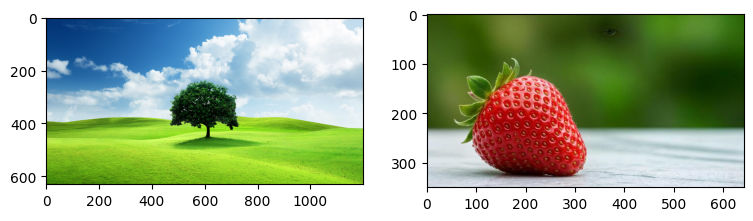

In [4]:
fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax2=fig.add_subplot(1,2,2)
ax2.imshow(img2)

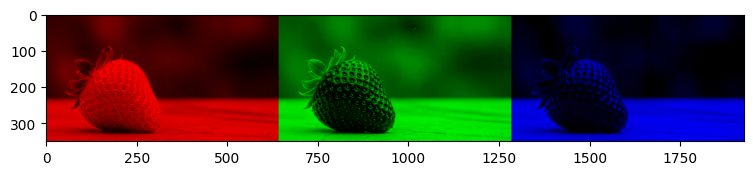

In [5]:
img2_r = img2.copy()
img2_r[:,:,1]=img2_r[:,:,2]=0
img2_g = img2.copy()
img2_g[:,:,0]=img2_g[:,:,2]=0
img2_b = img2.copy()
img2_b[:,:,0]=img2_b[:,:,1]=0
plot_image = np.concatenate((img2_r,img2_g,img2_b),axis=1)
plt.figure(figsize=(9,3))
plt.imshow(plot_image)


In [6]:
img2_r[:,:,0]

array([[ 49,  54,  54, ...,  40,  40,  40],
       [ 48,  52,  52, ...,  40,  40,  40],
       [ 46,  50,  50, ...,  41,  40,  40],
       ...,
       [211, 210, 209, ..., 213, 216, 216],
       [213, 212, 211, ..., 213, 216, 216],
       [214, 213, 213, ..., 214, 215, 215]], dtype=uint8)

In [7]:
from skimage.color import rgb2gray

img1_gs = rgb2gray(img1)
img2_gs = rgb2gray(img2)
print('Image shape : ',img1_gs.shape,'\n')

Image shape :  (630, 1200) 



In [8]:
print('2D image pixel map')
print(np.round(img2_gs,2),'\n')

2D image pixel map
[[0.27 0.28 0.28 ... 0.31 0.3  0.3 ]
 [0.26 0.28 0.28 ... 0.31 0.3  0.3 ]
 [0.25 0.27 0.27 ... 0.31 0.3  0.3 ]
 ...
 [0.85 0.85 0.84 ... 0.87 0.88 0.88]
 [0.86 0.86 0.85 ... 0.86 0.87 0.87]
 [0.86 0.86 0.86 ... 0.86 0.87 0.87]] 



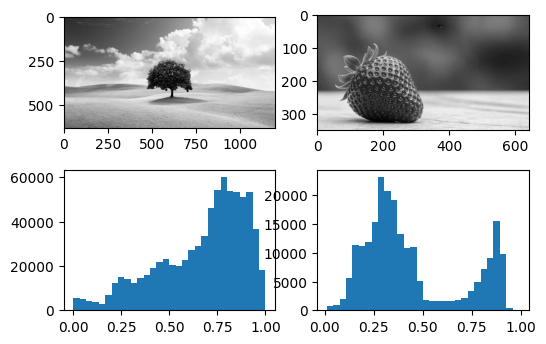

In [9]:
fig = plt.figure(figsize = (6,4))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img1_gs, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img2_gs, cmap="gray")
ax3 = fig.add_subplot(2,2,3)
p_freq, p_bins, c_patches = ax3.hist(img1_gs.flatten(), bins=30)
ax4 = fig.add_subplot(2,2,4)
l_freq, l_bins, l_patches = ax4.hist(img2_gs.flatten(), bins=30)

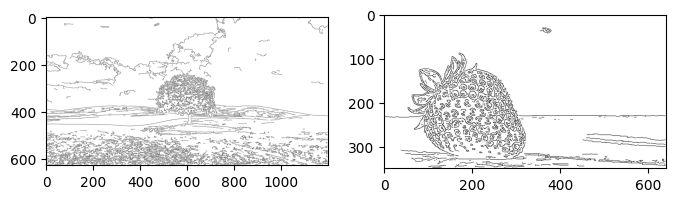

In [10]:
from skimage.feature import canny

img1_edges = canny(img1_gs, sigma=1)
img2_edges = canny(img2_gs, sigma=1)

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1_edges, cmap='binary')
ax2=fig.add_subplot(1,2,2)
ax2.imshow(img2_edges, cmap='binary')

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(350, 642)


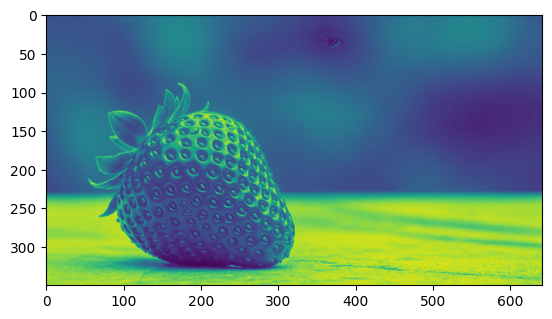

In [12]:
image= cv2.imread("img2.jpg",0)
plt.imshow(image)
print(image.shape)

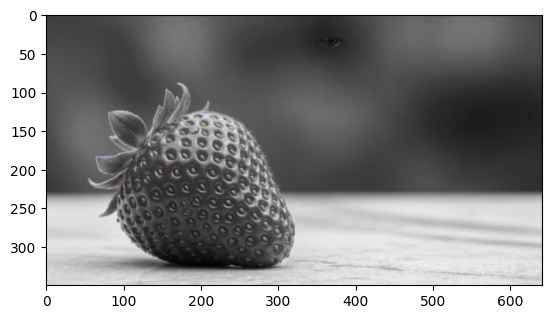

In [13]:
img = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2BGR)
plt.imshow(img)

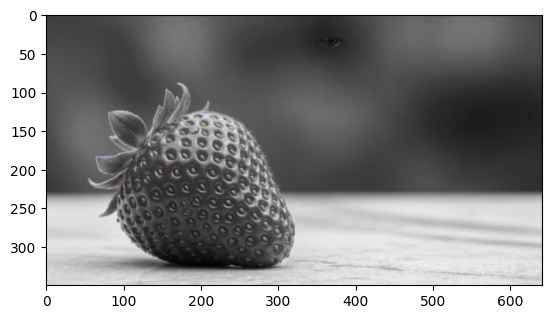

In [14]:
im=cv2.imread("img2.jpg",0)
plt.imshow(img)
plt.imshow(img,cmap="gray")

(<Axes: title={'center': 'Vertical image'}>,
 Text(0.5, 1.0, 'Vertical image'))

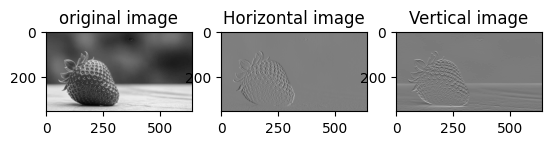

In [15]:
img1=cv2.Sobel(im, cv2.CV_64F,1,0,5)
img2=cv2.Sobel(im, cv2.CV_64F,0,1,5)

plt.subplot(1,3,1),plt.imshow(im,cmap='gray'),plt.title("original image")
plt.subplot(1,3,2),plt.imshow(img1,cmap='gray'),plt.title("Horizontal image")
plt.subplot(1,3,3),plt.imshow(img2,cmap='gray'),plt.title("Vertical image")

Text(0.5, 1.0, 'Laplacian Image')

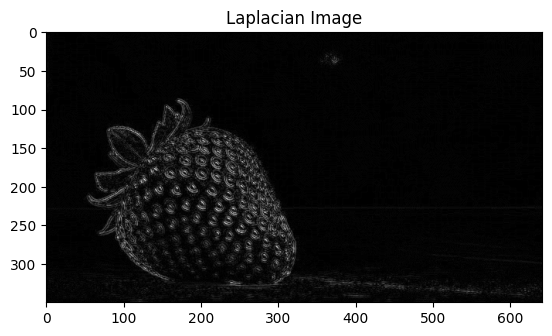

In [ ]:
blurred = cv2.GaussianBlur(image, (3, 3), 0)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian_abs, cmap="gray")
plt.title("Laplacian Image")